<a href="https://colab.research.google.com/github/sener7106/TiL/blob/main/ML_220117_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

- Decision Tree의 단점을 개선하기 위한 알고리즘 중 하나
- Decision Tree의 확장

- 데이터 분류, 군집, 특성의 중요성 확인, 데이터의 예측 등에 활용

- 분류 -> 지도학습, 종속 변수 있음, 예측 분류 하고 싶은 칸이 존재 , 종속 변수를 기준으로 분류

- 군집(Clustering) -> 비지도 학습, 종속 변수가 존재하지 않음
ex) 논문 1000개가 있는데 봐도 어떤 논문이랑 어떤 논문이 비슷한지 종속변수를 모르기 때문에 군집을 통해 분류해주는 작업이 필요.. 잠재적 디리클레 할당(Latent Dirichlet Allocation : LDA) 

## Random Forest의 특징

- 여러개의 Decision Tree 결합으로 단일 트리의 결점을 극복
- Overfitting 문제가 적음
- 구현이 간다하고, 병렬 계산이 간편하다.
- 기본 트리를 100개, CPU를 100개로 쪼개고 동시에 실행(Multi-Thread)


- R.F에서의 2가지 random
1) Dataset에서의 샘플 데이터를 random으로 선택
2) 선택한 샘플 데이터로 Decision Tree 생성

- 선택한 샘플 데이터에서 랜덤으로 f개의 feature를 선택
- 선택하는 feature의 개수는 기본으로 sqrt(전체 feature 수) , 선택으로 log2(전체 feature 수)를 방법으로 계산

if sqrt(10000) ~= 13.28 칸 선택

## Bootstrap 
데이터에서 얻어진 통계량의 표본오차를 확률 분포의 가정을 두지 않고 논 파라메트릭(non-para-metric)하게 평가하기 위한 하나의 방법. 이 방법에서는 주어진 데이터세트를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 재추출로 복수의 자료를 작성하고 각각에서 얻어진 통계량을 계산함. 계통추정론의 분야에서 계통수의 신뢰성을 평가할 목적으로 널리 사용되고 있음.
[네이버 지식백과] 부트스트랩 [bootstrap] (해양과학용어사전, 2005. 10. 7., 한국해양학회)


- Random Foreset 는 랜덤하게 feauture를 뽑아 Gini Impurity 를 비교한다.


## Voting 하기

# Random Forest - IRIS 데이터 분류

- 1. 1976년 보스턴 집값 데이터 : load_boston()
- 2. 꽃 데이터 : load_iris()
- 3. 인디언 당뇨병 데이터 : load_diabeetes()
- 4. 손글씨 숫자 이미지 : load_digits()
- 5. 운동 데이터 : load_linnerud()
- 6. 와인 데이터 : load_wine()
- 7. load_breast_cancer()

In [26]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus

In [27]:
#loading the iris ddataset
iris = load_iris()
# training data 설정
X_train = iris.data[:-30]
y_train = iris.target[:-30]
# test data 설정

X_test = iris.data[-30:] #test feature data
y_test = iris.target[-30:] #test target data

iris.keys()
# iris.data : iris data에서 feature 데이터를 호출
#iris.target : iris data에서 target 데이터를 호출
# dictionary 형태로 호출

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
print(y_train, y_test)

# test data의 target은 전부 2 (virginica)
# 훈련 셋과 테스트 셋의 분리가 잘 되지 않음

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2] [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.2)

In [50]:
#RandomForestClassifier 클래스 import

rfc = RandomForestClassifier(n_estimators=100)
# Sklearn.ensemble 모듈은 분류, 회귀 및 이상 탐지를 위한 ensemble-based 방법을 포함
#]

- 변수 설명 
 n_estimators : Decision Tree의 개수(default = 10)
 max_featrues : 최대 고려하는 feature의 개수(default = auto)
 oob_score : out-of-bag(OOB) 사용 여부 (default = False)

In [31]:
rfc.estimators_[8]

DecisionTreeClassifier(max_features='auto', random_state=373650249)

In [32]:

dt_dot_data = tree.export_graphviz(
    rfc.estimators_[8],
    feature_names = ["sepal length", "sepal width", "petal length", "petal width"], # 독립변수 칸이름
    class_names = ["setosa", "virsicolor", "virsinica"] # 종속변수 이름
)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)


In [33]:
tot = 120
gini = 1 - ((58 / 120) * (58 / 120)) + ((47 / 120) * (47 / 120)) + ((15 / 120) * (15 / 120))
gini

0.9354166666666667

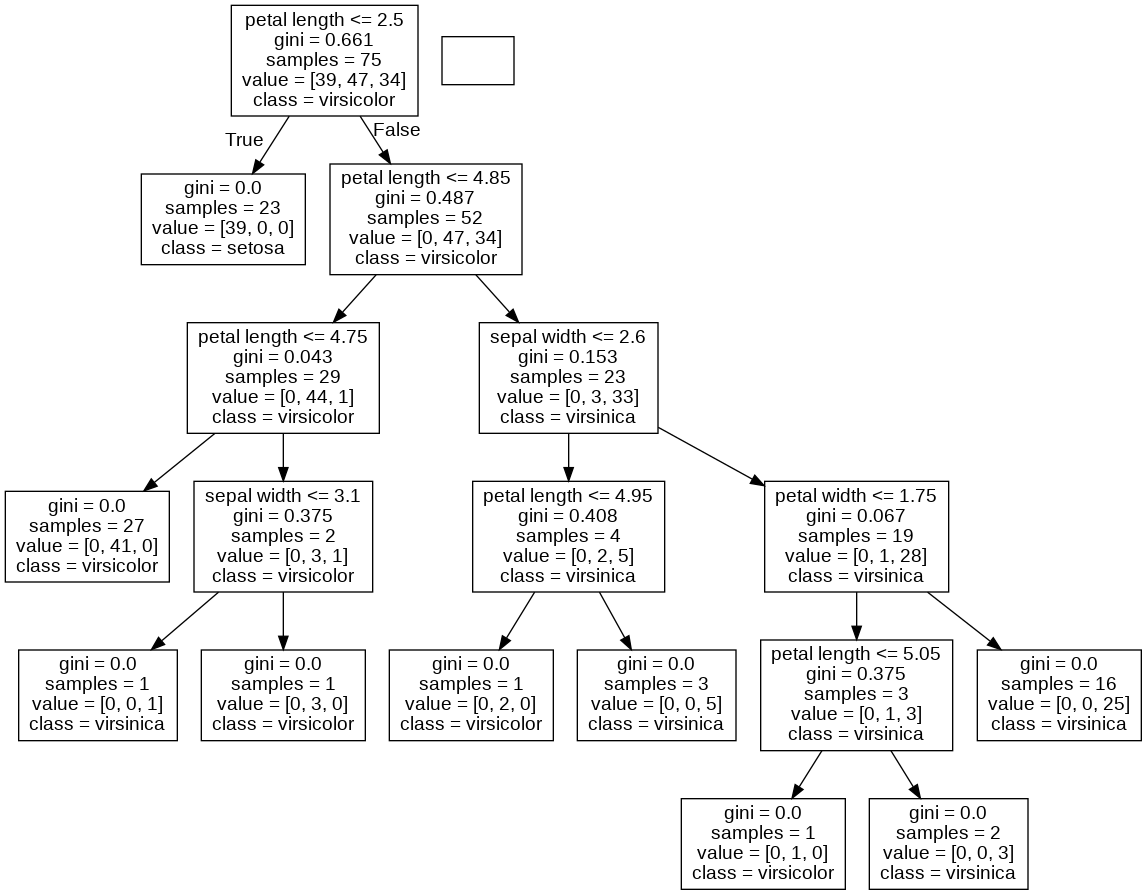

In [34]:
Image(dt_graph.create_png())

In [35]:
dt_graph.write_pdf("8번 째 트리 간직할래요.pdf")

True

In [51]:
rfc.fit(X_train, y_train)
# test_Data를 입력하여 target_data를 예측

prediction = rfc.predict(X_test)
# 예측 결과 precision 과 실제 test data 의 target 을 비교
print(prediction == y_test)
# 랜덤 포레스트 분류기 성능 평가
rfc.score(X_test, y_test)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


1.0

### 순서

- 1. 훈련데이터를 입력해 RFC학습
- 2. 분류기에 테스트 데이터를 입력해 목표 값을 예측하여 분류
- 3. 분류(예측)한 목표 값과 실제 목표 값을 비교하고 출력


### 성능평가

- sklearn.metrics : scikit-learn 패키지 중 모듈 성능 평가방법 모듈
- accuracy_score() : 분류 결과의 accuracy를 계산.
- classification_report() : 분류 결과의 precision, recall 을 계산

- y_test(테스트 데이터의 target data), prediction(테스트 데이터의 target 예측 값)

In [52]:
y_test

array([0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 1])

In [54]:
print("Accuracy is :", accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))

Accuracy is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction)

array([[ 9,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  7]])

# classification Report

# 예측 1의 정밀도(Precision) : 1로 예측한 데이터 중에서 true의 비율

= 1로 예측 개수 중 true의 개수 / 1로 예측한 개수 11 / (0 + 11 + 0)

# Recall.. conf_mat의 2행에 해당
= true 1의 재현율 0 : 전체  true 1 중 1이라고 제대로 예측한 비율  e / d + e + f = 12 / 13

# f1-score / 둘 모두 높으면 좋음
# macro avg -> 산술평균 , .. weighted avg -> 가중평균
- Precision, Recall을 숫자 하나로 계산
f1 score = 2 * recall * precision / (recall + precision)

- weighted avg(가중 평균) :  (각 데이터 가중치 * precision) 의 합/ 전체 데이터 수. true의 비율이 높은 데이터에 가중치를 더 부여하기 위함.


In [56]:
clf_2 = RandomForestClassifier(n_estimators= 200, max_features = 4, oob_score = True)
clf_2.fit(X_train, y_train)
prediction_2 = clf_2.predict(X_test)

print("Accuracy is : ", accuracy_score(prediction_2, y_test))
print(classification_report(y_test, prediction_2))

Accuracy is :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [57]:
confusion_matrix(y_test, prediction_2)

array([[ 9,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  7]])

In [58]:
clf_2.feature_importances_

array([0.01814119, 0.01677704, 0.4499962 , 0.51508557])

In [59]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 컬럼 중요도 : Information Gain을 계산해서 컬럼의 중요도를 계산함

가장큰게 좋고
원래 Gini가 높았는데(섞였는데) 분류하고 나서 Gini 낮은 (잘 분류) 되는 컬럼

-> Decision tree에 비해 많이 비교되는 컬럼

-> oob score < = false , 컬럼 중요도를 계산하지 않음 - 어차피 의사결정트리 다돌리기떄문


In [60]:
ls = list(zip(iris.feature_names, clf_2.feature_importances_))             

In [61]:
for feature, imp in ls :
  print("feature = ", feature)
  print("imp = ", imp)
  print("=" * 100)

feature =  sepal length (cm)
imp =  0.01814119024146658
feature =  sepal width (cm)
imp =  0.016777041747937056
feature =  petal length (cm)
imp =  0.4499961995522788
feature =  petal width (cm)
imp =  0.5150855684583175
